[View in Colaboratory](https://colab.research.google.com/github/SnehJain/Convolutional-Neural-Network/blob/master/CNN_on_fashion_mnist_data_using_keras_GPU_accelerator_on_COLAB.ipynb)

## Uploading files from your local file system

`files.upload` returns a dictionary of the files which were uploaded.
The dictionary is keyed by the file name, the value is the data which was uploaded.

---

For more details go to : https://colab.research.google.com/notebooks/io.ipynb#scrollTo=RWSJpsyKqHjH

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving t10k-images-idx3-ubyte.gz to t10k-images-idx3-ubyte.gz
Saving t10k-labels-idx1-ubyte.gz to t10k-labels-idx1-ubyte.gz
Saving train-images-idx3-ubyte.gz to train-images-idx3-ubyte.gz
Saving train-labels-idx1-ubyte.gz to train-labels-idx1-ubyte.gz
User uploaded file "t10k-images-idx3-ubyte.gz" with length 4422102 bytes
User uploaded file "t10k-labels-idx1-ubyte.gz" with length 5148 bytes
User uploaded file "train-images-idx3-ubyte.gz" with length 26421880 bytes
User uploaded file "train-labels-idx1-ubyte.gz" with length 29515 bytes


In [0]:
from google.colab import files
files.os.listdir()

['sample_data',
 '.config',
 'train-images-idx3-ubyte.gz',
 't10k-labels-idx1-ubyte.gz',
 't10k-images-idx3-ubyte.gz',
 'train-labels-idx1-ubyte.gz']

## Mounting Google Drive locally

The example below shows how to mount your Google Drive in your virtual machine using an authorization code, and shows a couple of ways to write & read files there. Once executed, observe the new file (`foo.txt`) is visible in https://drive.google.com/

Note this only supports reading and writing files; to programmatically change sharing settings etc use one of the other options below.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


As the drive is mounted at /content/gdrive. 

1.   Go tot Files , refresh it and it will be visible there.
2.   Below is how you can get the path of your folder/file, so that it can be used in colab "path"(usually what people use) variable .



In [2]:
!echo /content/gdrive/My\ Drive/datasets/fashion
!ls /content/gdrive/My\ Drive/datasets/fashion

/content/gdrive/My Drive/datasets/fashion
t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz


##Fuction for reading fashion mnist data
link for the function: https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py

In [0]:
def load_mnist(path):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path+'-labels-idx1-ubyte.gz')
    images_path = os.path.join(path+'-images-idx3-ubyte.gz')

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

**Reading the data from uploaded files**

In [0]:
#Copy the path from above echo command
_ = '/content/gdrive/My Drive/datasets/fashion/train'
train_imgs, train_labels = load_mnist(_)
_ = '/content/gdrive/My Drive/datasets/fashion/t10k'
test_imgs, test_labels = load_mnist(_)

In [5]:
print('no. of training images: ',len(train_imgs))
print('no. of training labels:',len(train_labels))
print('no. of testing images: ',len(test_imgs))
print('no. of testing labels:',len(test_labels))
print('\n#length of a single image')
print('length of first image: ',len(train_imgs[0]))
print('label of first image : ',train_labels[0])

no. of training images:  60000
no. of training labels: 60000
no. of testing images:  10000
no. of testing labels: 10000

#length of a single image
length of first image:  784
label of first image :  9


***One-hot encoding***

As one can see the label of first image is not an array i.e. it is not one-hot encoded. Below is the function which we will use to code labels into one-hot encoding. Eg.
>>> a = np.array([1, 0, 3])

>>> b = np.zeros((3, 4))

>>> b[np.arange(3), a] = 1

>>> b

```
# This is formatted as code
```


Output : array([[ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [0]:
import numpy as np
def one_hot_en(label):
  a = len(label)
  b = np.zeros((a,10))
  b[np.arange(a), label] = 1
  return b

In [0]:
one_hot_train_labels = one_hot_en(train_labels)
one_hot_test_labels = one_hot_en(test_labels)

In [8]:
#Just verifying
print(train_labels[0:5])
print(one_hot_train_labels[0:5])
print(test_labels[0:5])
print(one_hot_test_labels[0:5])

[9 0 0 3 0]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[9 2 1 1 6]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [9]:
print(train_imgs.shape)
print(one_hot_train_labels.shape)
print(test_imgs.shape)
print(one_hot_test_labels.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


**Reshaping the images from (60000,784) to (60000,1,28,28).
1 represents the channels in the image.**

In [10]:
train_imgs_rsh = np.reshape(train_imgs, (60000,1,28,28))
test_imgs_rsh = np.reshape(test_imgs, (10000,1,28,28))
print(train_imgs_rsh.shape)
print(test_imgs_rsh.shape)

(60000, 1, 28, 28)
(10000, 1, 28, 28)


Normalizing array values of each image between 0 and 1 which is between 0 and 255 by default.

In [0]:
train_imgs_rsh = train_imgs_rsh.astype('float32')
test_imgs_rsh = test_imgs_rsh.astype('float32')
train_imgs_rsh /= 255
test_imgs_rsh /= 255

## Visualizing a Single image from training and testing dataset.

In [0]:
# Create dictionary of target classes
label_dict = {
    0: 'T-shirt/top', 
    1: 'Trouser', 
    2: 'Pullover', 
    3: 'Dress', 
    4: 'Coat', 
    5: 'Sandal', 
    6: 'Shirt', 
    7: 'Sneaker', 
    8: 'Bag', 
    9: 'Ankle boot',
}

In [0]:
import matplotlib.pyplot as plt

Text(0.5,1,'(Label: Ankle boot)')

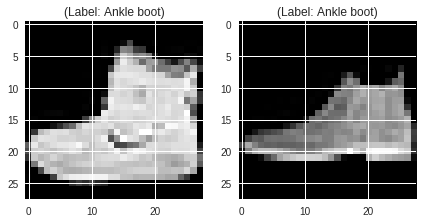

In [14]:
plt.figure(figsize=[7,7])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(train_imgs_rsh[0], (28,28))
curr_lbl = np.argmax(one_hot_train_labels[0,:])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(test_imgs_rsh[0], (28,28))
curr_lbl = np.argmax(one_hot_test_labels[0,:])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

## Defining Keras Model (Tensorflow backend)

In [0]:
import numpy as np
import pandas as pd

## Confirm TensorFlow can see the GPU

Simply select "GPU" in the Accelerator drop-down in Notebook Settings (either through the Edit menu or the command palette at cmd/ctrl-shift-P).

In [16]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [17]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.layers import MaxPooling2D, ZeroPadding2D
from keras.layers.convolutional import Conv2D
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Activation
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
# Three steps to create a CNN
# 1. Convolution
# 2. Activation
# 3. Pooling
# Repeat Steps 1,2,3 for adding more hidden layers

# 4. After that make a fully connected network
# This fully connected network gives ability to the CNN
# to classify the samples

model = Sequential()

model.add(Conv2D(32, (3, 3), data_format="channels_first", input_shape=(1,28,28,)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Fully connected layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))

model.add(Activation('softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 26, 26)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 26, 26)        104       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 26, 26)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 24, 32)        7520      
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 24, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 30, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 12, 32)        0         
__________

Making sure if GPU is in use or not.

---


For more introduction one can go to https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d

In [21]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

The model is not yet fully trained, we are just trying to fit the model. The value of epochs used can be changed. Depending on the model one can easily get sufficient result  if epochs value is between 5 to 30 epochs(it depends on models and optimizers). After a particualer range of epochs the model will overfit and the training accuracy will become 1. 

### Without data augmentation

In [22]:
model.fit(x=train_imgs_rsh, y=one_hot_train_labels, 
           batch_size=128, 
           epochs=2, 
           verbose=2, 
           validation_data = (test_imgs_rsh, one_hot_test_labels)
           )

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
 - 18s - loss: 0.4526 - acc: 0.8359 - val_loss: 0.3746 - val_acc: 0.8640
Epoch 2/2
 - 15s - loss: 0.3057 - acc: 0.8884 - val_loss: 0.3481 - val_acc: 0.8761


### With data augmentation

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
gen = ImageDataGenerator(rotation_range=8,
                         width_shift_range=0.08,
                         shear_range=0.3,
                         height_shift_range=0.08,
                         zoom_range=0.08,
                        data_format= "channels_first")
test_gen = ImageDataGenerator(data_format= "channels_first")

In [0]:
train_generator = gen.flow(train_imgs_rsh, one_hot_train_labels, batch_size=128)
test_generator = test_gen.flow(test_imgs_rsh, one_hot_test_labels, batch_size=128)

In [26]:
model.fit_generator(train_generator,
                    steps_per_epoch=60000//128, 
                    epochs=2, 
                    validation_data=test_generator,
                    validation_steps=10000//128,
                   verbose = 2)

Epoch 1/2
 - 25s - loss: 0.4490 - acc: 0.8318 - val_loss: 0.3654 - val_acc: 0.8688
Epoch 2/2
 - 25s - loss: 0.3846 - acc: 0.8553 - val_loss: 0.3617 - val_acc: 0.8687


As you can see above the accuarcy after applying data augmentaion is not incerasing, that means we are applying the augmentaions in a wrong way. The Augmentaion steps are in a need to be corrected.